In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
df = pd.read_csv("insurance.csv")  

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
df.shape

(1338, 7)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [21]:
## The above result show that attributes are not null. Another efficient way of checking total null values in the features is:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [23]:
#### This  data is from people from age 18 years to 64 years whose BMI ranges from about 16 to 53. They have children 0 to 5.
#### They have got charges from 1122 to 64000.

In [24]:
df_num = df.select_dtypes(include=['number']).copy()
df_cat = df.select_dtypes(include=['object']).copy()

In [25]:
print([df_cat[x].unique() for x in df_cat]) #print unique values of categorical variables.

[array(['female', 'male'], dtype=object), array(['yes', 'no'], dtype=object), array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)]


Text(0, 0.5, 'Counts')

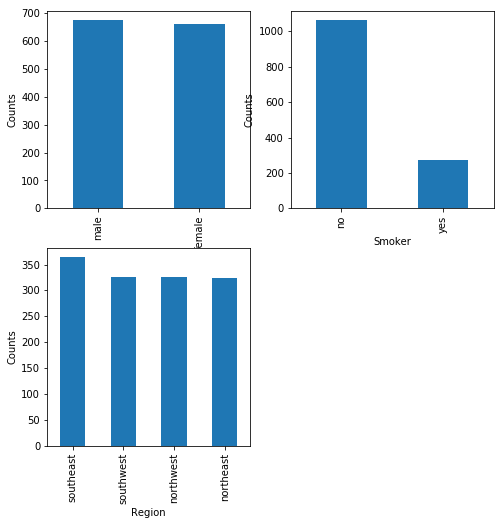

In [26]:
plt.figure(figsize=(8,8))
plt.subplot(221)
df.sex.value_counts().plot.bar()
plt.xlabel("Sex") 
plt.ylabel("Counts")
plt.subplot(222)
df.smoker.value_counts().plot.bar()
plt.xlabel("Smoker")
plt.ylabel("Counts")
plt.subplot(223)
df.region.value_counts().plot.bar()
plt.xlabel("Region")
plt.ylabel("Counts")


C:\Users\Som\Documents\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Som\Documents\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Som\Documents\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


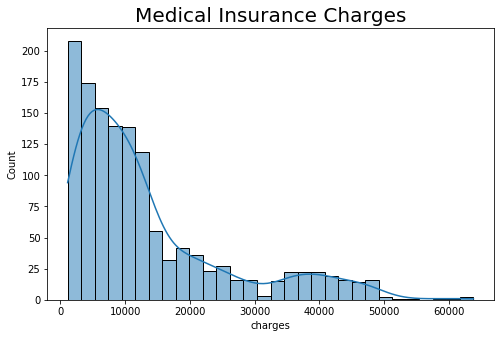

In [27]:
# Histrogram of Medical Insurance Charges:
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], kde=True)
plt.title('Medical Insurance Charges', fontsize=20)
plt.show()

C:\Users\Som\Documents\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


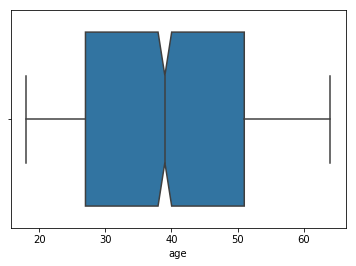

C:\Users\Som\Documents\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


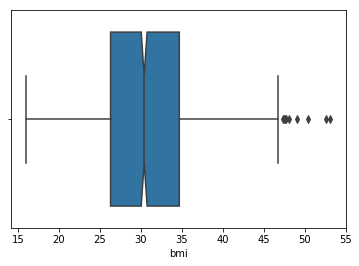

C:\Users\Som\Documents\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


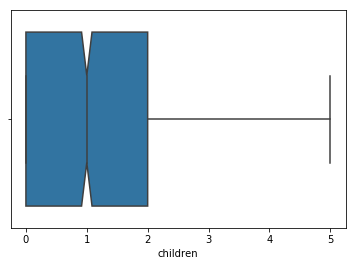

C:\Users\Som\Documents\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


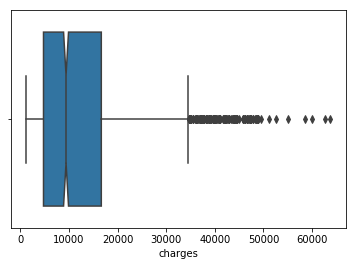

In [28]:
for key in df_num.columns:
    sns.boxplot(df_num[key],notch =True)
    plt.show()

In [29]:
# Computing 10th, 90th percentiles and replacing the outliers
def ReplaceOutlier(data):
    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)
    # print(tenth_percentile, ninetieth_percentile)
    new_data = np.where(data<=tenth_percentile, tenth_percentile, data)
    new_data = np.where(new_data>=ninetieth_percentile, ninetieth_percentile, new_data)# print("Sample:", sample)
    return new_data

In [30]:
for key in df_num.columns:
    df_num[key] = ReplaceOutlier(df_num[key])

C:\Users\Som\Documents\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


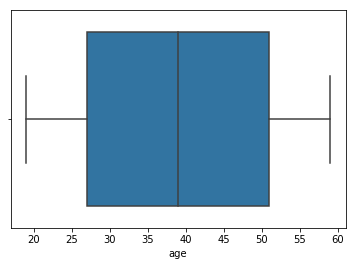

C:\Users\Som\Documents\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


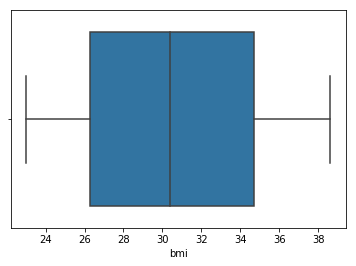

C:\Users\Som\Documents\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


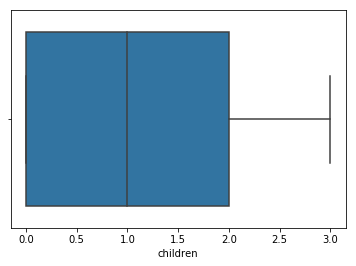

C:\Users\Som\Documents\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


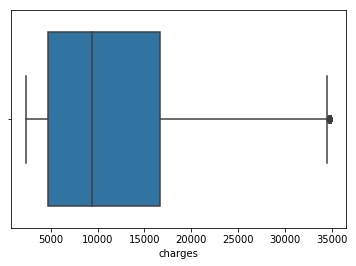

In [31]:
for key in df_num.columns:
    sns.boxplot(df_num[key])
    plt.show()

In [32]:
df_new = pd.concat([df_num, df_cat], axis=1)

In [33]:
df_new

,age,bmi,children,charges,sex,smoker,region
0,19.0,27.90,0.0,16884.924000,female,yes,southwest
1,19.0,33.77,1.0,2346.533615,male,no,southeast
2,28.0,33.00,3.0,4449.462000,male,no,southeast
3,33.0,22.99,0.0,21984.470610,male,no,northwest
4,32.0,28.88,0.0,3866.855200,male,no,northwest
...,...,...,...,...,...,...,...
1333,50.0,30.97,3.0,10600.548300,male,no,northwest
1334,19.0,31.92,0.0,2346.533615,female,no,northeast
1335,19.0,36.85,0.0,2346.533615,female,no,southeast
1336,21.0,25.80,0.0,2346.533615,female,no,southwest


In [34]:
df_new.keys()

Index(['age', 'bmi', 'children', 'charges', 'sex', 'smoker', 'region'], dtype='object')

In [35]:
df_new = df_new[['age', 'bmi', 'children', 'sex', 'smoker', 'region', 'charges']]

In [36]:
df_new

,age,bmi,children,sex,smoker,region,charges
0,19.0,27.90,0.0,female,yes,southwest,16884.924000
1,19.0,33.77,1.0,male,no,southeast,2346.533615
2,28.0,33.00,3.0,male,no,southeast,4449.462000
3,33.0,22.99,0.0,male,no,northwest,21984.470610
4,32.0,28.88,0.0,male,no,northwest,3866.855200
...,...,...,...,...,...,...,...
1333,50.0,30.97,3.0,male,no,northwest,10600.548300
1334,19.0,31.92,0.0,female,no,northeast,2346.533615
1335,19.0,36.85,0.0,female,no,southeast,2346.533615
1336,21.0,25.80,0.0,female,no,southwest,2346.533615


In [37]:
# Encoding:
df_new = pd.get_dummies(df_new, drop_first=True)

In [38]:
df_new.keys()

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [39]:
#Rearrange the columns
df_new = df_new[['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest', 'charges']]

In [40]:
df_new

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,19.0,27.90,0.0,0,1,0,0,1,16884.924000
1,19.0,33.77,1.0,1,0,0,1,0,2346.533615
2,28.0,33.00,3.0,1,0,0,1,0,4449.462000
3,33.0,22.99,0.0,1,0,1,0,0,21984.470610
4,32.0,28.88,0.0,1,0,1,0,0,3866.855200
...,...,...,...,...,...,...,...,...,...
1333,50.0,30.97,3.0,1,0,1,0,0,10600.548300
1334,19.0,31.92,0.0,0,0,0,0,0,2346.533615
1335,19.0,36.85,0.0,0,0,0,1,0,2346.533615
1336,21.0,25.80,0.0,0,0,0,0,1,2346.533615


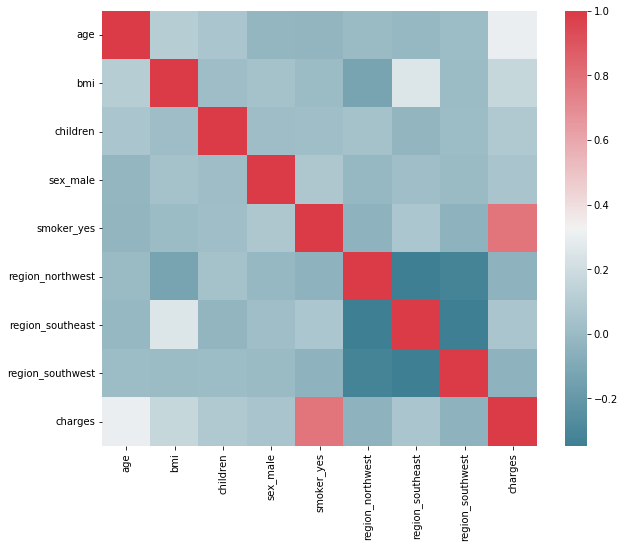

In [41]:
f, ax = plt.subplots(figsize=(10, 8))
#plt.matshow(df_new.corr(), fignum=f.number)
corr=df_new.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [42]:
# Splitting Independent & Dependent Feature:
X = df_new.iloc[:, :-1]
y = df_new.iloc[:, -1]

In [43]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [44]:
# Importing Performance Metrics:
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
# Linear Regression:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR = LR.fit(X_train, y_train)

In [50]:
#Prediction:
y_pred = LR.predict(X_test)

#Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.7922156875455877
22234580.588203773


In [149]:
# Ridge:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge = Ridge.fit(X_train, y_train)

# Prediction:
y_pred = Ridge.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.7920553822759349
22251734.53209255


In [150]:
# Lasso:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso = Lasso.fit(X_train, y_train)

# Prediction:
y_pred = Lasso.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.7921883361120635
22237507.40999177


In [47]:
# Random Forest Regressor:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF = RF.fit(X_train, y_train)

# Prediction:
y_pred = RF.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8406812023707876
17048383.505273763


In [152]:
# Creating a pickle file for the classifier
import pickle
filename = 'InsuranceCost.pkl'
pickle.dump(RandomForestRegressor, open(filename, 'wb'))